# Method of moments 

We can estimate parameters of probability densities from observations in data by using the method of moments (as we saw in lectures). Remember that our estimators are defined by equating the moments (either central or algebraic) of the probability density function with the sample moments (sample mean, sample variance ...).

In this example, we'll look at a Gaussian distributed random variable $X\sim\phi(3,1.5)$ - i.e $X$ is distributed as a Gaussian with $\mu=3$ and $\sigma=1.5$. 

For a Gaussian, we know that the first algebraic moment (the mean) is given by 

$$
\mu_1  = E[X]_{\phi} = \mu
$$

and the second central moment (variance), is 

$$
\nu_{2} = E[(X-E[X])^{2}]_{\phi} = \sigma^{2}
$$


Now in general for a sample of $n$ observations, the sample mean is given by 
$$
\bar{X} = \frac{1}{n}\sum_{i=1}^{n} X_{i}
$$

and the sample variance is given by 

$$
\bar{V} = \frac{1}{n}\sum_{i=1}^{n} (X_{i}-\bar{X})^{2}
$$

In the method of moments then, we equate the sample mean with $\mu_{1}$ and the sample variance with $\nu_{2}$ to obtain our estimates $\hat{\mu}$ and $\hat{\sigma}$, 

$$
\mu = \mu_{1} \implies \hat{\mu} = \bar{X}  
$$

and 

$$
\sigma^{2} = \nu_{1} \implies \hat{\sigma} = \sqrt{\bar{V}}  
$$

In [1]:
%matplotlib inline

import numpy
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})

from scipy.stats import norm

mu_true = 3 
sigma_true = 1.5

nsamples = 10

# generate random values using rvs
toys = norm.rvs(mu_true,sigma_true,size=nsamples)

# numpy calculation of sample mean
sample_mean = numpy.mean(toys)

# numpy calculation of std deviation == sqrt(sample variance)
sample_variance = numpy.std(toys)**2
print(toys)
print("mu_hat = %g, sigma_hat = %g"%(sample_mean,sample_variance**0.5))

[4.53469071 3.36183063 1.37239465 2.5955962  2.57118772 1.45781772
 2.07833346 4.69339037 2.18677629 4.91920947]
mu_hat = 2.97712, sigma_hat = 1.26165


A desireable property of an estimator is that for large data sets (as the number of data increases), the estimator should converge to the true value of the parameter. Otherwise, we would end up with biased results even in the limit of infinite data (which of course is not ideal). We call this property *consistent*.

In later lectures, we'll see an example proof of likelihood based estimators being consistent, but for now, lets check if our method of moments estimators in this case are consistent. 

To do this, we can see how close the sample estimators for $\mu$ and $\sigma$ come to the true values as we increase the number in our sample $n$.

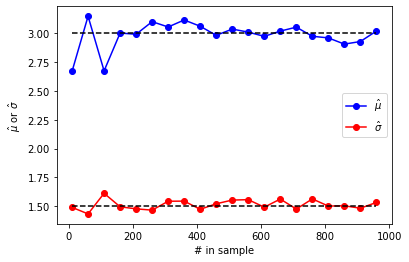

In [12]:
ns_sets = range(10,1000,50)
mu_hats = []
sigma_hats = []

for nsamples in ns_sets:
    toys = norm.rvs(mu_true,sigma_true,size=nsamples)
    mu_hats.append(numpy.mean(toys))
    sigma_hats.append(numpy.std(toys))

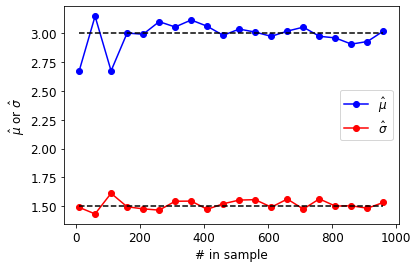

In [49]:
plt.plot(ns_sets,mu_hats,color='blue',marker="o",label="$\hat{\mu}$")
plt.plot(ns_sets,sigma_hats,color='red',marker="o",label="$\hat{\sigma}$")
plt.xlabel("# in sample")
plt.ylabel("$\hat{\mu}$ or $\hat{\sigma}$")

plt.plot([ns_sets[0],ns_sets[-1]],[mu_true,mu_true],color='black',linestyle="--")
plt.plot([ns_sets[0],ns_sets[-1]],[sigma_true,sigma_true],color='black',linestyle="--")

plt.legend()
plt.savefig("moments_norm_example.pdf")
plt.show()

Of course, until we reach infinity, we can't be sure that the estimator has converged to the true values. In fact, you can see that if you run the cell above again, the plots look different. This is because there is an intrisic variation on our moment estimators -- they are also random numbers!

## Expectation of estimators (bias)

One property of estimators that we are interested in is the *bias* of the estimator. The bias of an estimator is given by the expectation of the difference between the estimator and the true value of the parameter being estimated. 

$$
bias(\theta) = E[\hat{\theta}-\theta] 
$$

and we say that an estimator is unbiased if $bias(\theta) = 0$. In the lectures, we showed that for the case of a normal distribution, the estimator of the mu parameter is unbiased. We can also check this with toys by generating samples from our normal distribution and estimating the $mu$ parameter. We also saw that instead, the estimator for the sigma parameter is not unbiased!

The bias depends on the sample size so first lets see what this looks like for a dataset of 10 entries. Change `num_entries` to see how / if the bias changes as a function of the sample size. 

In [30]:
num_entries = 10 
number_of_mc_samples = 10000 # number of MC used to determine expectation. 
toys = []
for i in range(number_of_mc_samples): 
    toys.append(norm.rvs(mu_true,sigma_true,size=num_entries)) 

E[mu_hat]    = 3.00204
E[sigma_hat] = 1.39072


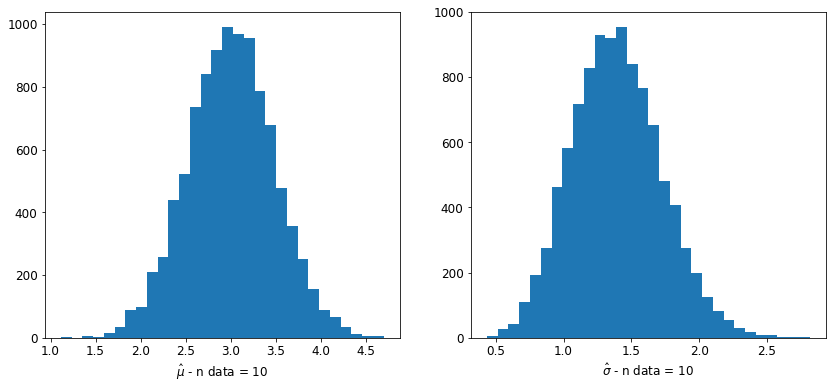

In [42]:
plt.rcParams.update({'font.size': 12})
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))

ax1.hist([numpy.mean(toys[i]) for i in range(number_of_mc_samples)],bins=30)
ax2.hist([numpy.std(toys[i]) for i in range(number_of_mc_samples)],bins=30)
ax1.set_xlabel("$\hat{\mu}$ - n data = %d"%num_entries)
ax2.set_xlabel("$\hat{\sigma}$ - n data = %d"%num_entries)

mean_of_mu    = numpy.mean([numpy.mean(toys[i]) for i in range(number_of_mc_samples)])
mean_of_sigma = numpy.mean([numpy.std(toys[i]) for i in range(number_of_mc_samples)])

print("E[mu_hat]    = %g"%mean_of_mu)
print("E[sigma_hat] = %g"%mean_of_sigma)

plt.savefig("bias_of_estimator.pdf")
plt.show()

Let's see how this bias changes as the sample size gets larger

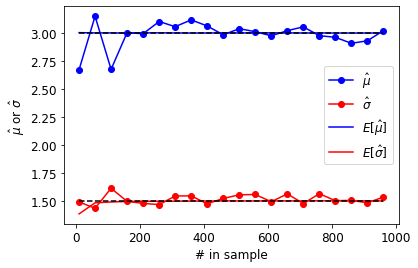

In [48]:
number_of_mc_samples = 10000 # number of MC used to determine expectation. 

def calculate_bias_mu(num_entries): 
    toys = []
    for i in range(number_of_mc_samples): 
        toys.append(norm.rvs(mu_true,sigma_true,size=num_entries)) 
    b_mu = numpy.mean([numpy.mean(toys[i]) for i in range(number_of_mc_samples)])   
    return b_mu
    
def calculate_bias_sigma(num_entries): 
    toys = []
    for i in range(number_of_mc_samples): 
        toys.append(norm.rvs(mu_true,sigma_true,size=num_entries)) 
    b_sig= numpy.mean([numpy.std(toys[i]) for i in range(number_of_mc_samples)])
    return b_sig
    
bias_mu    = [calculate_bias_mu(n) for n in ns_sets]
bias_sigma = [calculate_bias_sigma(n) for n in ns_sets]

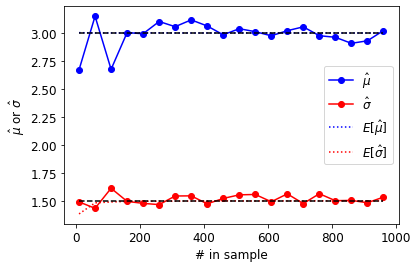

In [51]:
plt.plot(ns_sets,mu_hats,color='blue',marker="o",label="$\hat{\mu}$")
plt.plot(ns_sets,sigma_hats,color='red',marker="o",label="$\hat{\sigma}$")
plt.plot(ns_sets,bias_mu,color='blue',linestyle='dotted',label="$E[\hat{\mu}]$")
plt.plot(ns_sets,bias_sigma,color='red',linestyle='dotted',label="$E[\hat{\sigma}]$")

plt.xlabel("# in sample")
plt.ylabel("$\hat{\mu}$ or $\hat{\sigma}$")

plt.plot([ns_sets[0],ns_sets[-1]],[mu_true,mu_true],color='black',linestyle="--")
plt.plot([ns_sets[0],ns_sets[-1]],[sigma_true,sigma_true],color='black',linestyle="--")

plt.legend()
plt.savefig("moments_norm_example_with_bias.pdf")